In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Import Datasets

df = pd.read_csv("Big Mart Sales Prediction - Analytics Vidhya\\train_BigMart.csv")
test_df = pd.read_csv("Big Mart Sales Prediction - Analytics Vidhya\\test_BigMart.csv")

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(8523, 12)

In [6]:
# Check the unique values in Item_Fat_Content

df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
# 'Low Fat', 'low fat', 'LF' are same, hence we will replace all of them with 'low fat'
# 'Regular' and 'reg' are same, hence we will replace them with 'Regular'

df1 = df.replace(['Low Fat', 'LF'], 'low fat')
df1['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)
df1['Item_Fat_Content'].unique()

array(['low fat', 'Regular'], dtype=object)

In [8]:
# Check unique elements in Item_Type

df1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [9]:
# Check unique elements in Outlet_Size

df1['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
# There is NaN value in Outlet_Size. We will treat it later

In [11]:
# Check unique values in Outlet_Location_Type

df1['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [12]:
# Values in Outlet_Location_Type are of the type 'object' and can be changed to type 'int' easily

# We will treat it later

In [13]:
# Check unique values in Outlet_Type

df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [14]:
# Check the number of NaN in the datframe

df1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
# Check the outlets having Outlet_Size NaN

df1.Outlet_Identifier[df1['Outlet_Size'].isna()]. unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [16]:
# Check the unique Outlets

df1['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [17]:
df1['Outlet_Size'].mode()

0    Medium
dtype: object

In [18]:
# In a Practical Scenario, we would enquire with the client about the Outlet Size of OUT010, OUT017 and OUT045

# However, in this scenario, we will consider these three outlets to be of size Medium (Mode is medium and it is also the middle value)

df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0], inplace = True)

In [19]:
df1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
df1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [21]:
# List out Item_Type which have Item_Weight as NaN

list_nan_weight_type = df1.Item_Type[df1['Item_Weight'].isna()]. unique()
list_nan_weight_type

array(['Snack Foods', 'Hard Drinks', 'Baking Goods', 'Canned',
       'Fruits and Vegetables', 'Dairy', 'Frozen Foods', 'Household',
       'Breakfast', 'Soft Drinks', 'Meat', 'Health and Hygiene',
       'Starchy Foods', 'Others', 'Seafood', 'Breads'], dtype=object)

In [22]:
# Let's check if the weight is NaN for all items of this Item_Type or not

In [23]:
# Check Item_Weight of Snack Foods

df1.Item_Weight[df1['Item_Type'] == 'Snack Foods'].unique()

array([13.65 ,    nan, 17.6  , 18.85 ,  7.645, 18.7  , 13.6  ,  7.905,
       15.1  , 17.7  , 15.6  , 12.85 ,  7.76 , 16.75 ,  6.305,  8.31 ,
       19.75 ,  7.485, 11.65 , 21.25 , 14.   , 11.35 ,  5.78 , 18.25 ,
        6.67 , 11.8  , 16.85 ,  7.07 ,  6.48 ,  7.71 , 10.395,  9.   ,
       15.25 , 15.2  , 13.8  , 10.5  ,  6.865, 15.5  , 10.3  , 15.15 ,
        9.5  , 19.7  , 14.15 ,  6.785, 13.5  , 16.7  ,  7.235,  9.195,
       19.   ,  9.395, 20.85 ,  6.675, 12.3  , 18.5  ,  9.285, 16.   ,
        5.175,  9.695, 17.25 , 10.1  , 20.35 , 13.35 , 13.15 , 16.5  ,
        7.42 ,  7.365, 19.85 , 13.   ,  5.675,  8.895, 21.   ,  6.405,
        9.3  , 10.195, 20.75 , 18.2  ,  8.655, 14.85 ,  7.51 ,  8.02 ,
       11.5  ,  9.8  , 14.75 , 19.2  , 19.6  , 18.75 ,  7.945,  8.63 ,
        7.21 , 10.   , 18.6  , 10.695, 15.85 , 15.7  ,  6.385,  9.6  ,
       17.85 , 20.6  ,  6.61 , 17.   ,  6.035, 14.65 ,  7.05 , 11.15 ,
       10.8  , 14.1  , 10.85 ,  5.785, 18.   , 17.5  , 15.   ,  6.195,
      

In [24]:
df2 = df1.copy()

In [25]:
df2['Item_Weight'] = df1.groupby("Item_Type").transform(lambda x: x.fillna(x.median()))

In [26]:
df2.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
len(df2['Item_Identifier'].unique())

1559

In [29]:
df2['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

### Univariate Analysis - Numerical variables

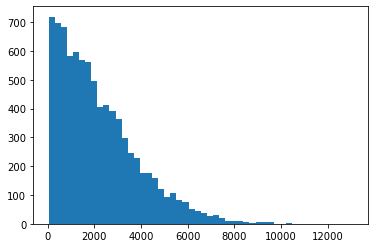

In [30]:
# Plot for Item_Outlet_Sales (Dependent variable)

plt.hist(df2['Item_Outlet_Sales'], bins = 50)
plt.show()

In [31]:
# The data is right skewed and will have to be treated

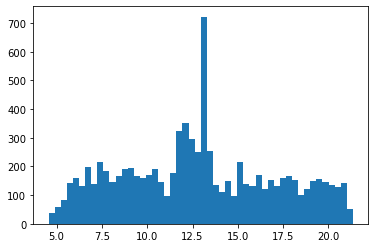

In [32]:
# Plot for Item_Weight

plt.hist(df2['Item_Weight'], bins = 50)
plt.show()

In [33]:
# There is no pattern in Item_Weight

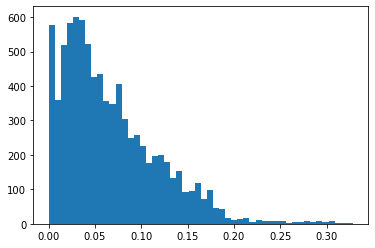

In [34]:
# Plot for Item_Visibility

plt.hist(df2['Item_Visibility'], bins = 50)
plt.show()

In [35]:
# Item_Visibility is right skewed and will have to be treated

In [36]:
df2['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

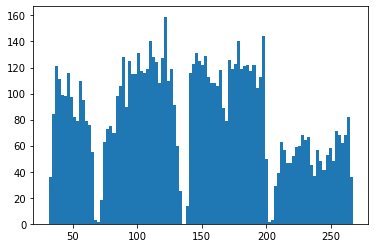

In [37]:
# Plot for Item_MRP

plt.hist(df2['Item_MRP'], bins = 100)
plt.show()

In [38]:
# There are 4 different distributions in Item_MRP

### Univariate Analysis - Categorical Variable

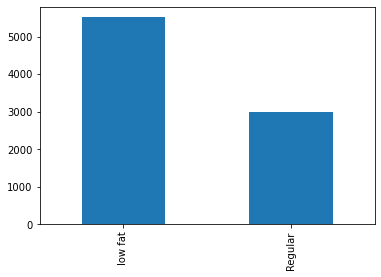

In [39]:
# Plot for Item_Fat_Content

df2['Item_Fat_Content'].value_counts().plot.bar()

In [40]:
# Number of low Fat Items is more than Regular Fat Items

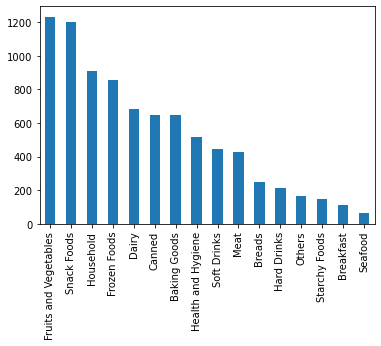

In [41]:
# Plot for Item_Type

df2['Item_Type'].value_counts().plot.bar()

In [42]:
# Fruits & Vegetables is the more popular Type, while Seafood is the least popular

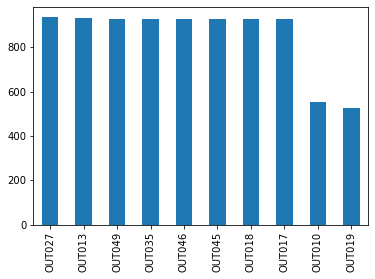

In [43]:
# Plot for Outlet_Identifier

df2['Outlet_Identifier'].value_counts().plot.bar()

In [44]:
# Outlet OUT010 and OUT019 seems to be less popular

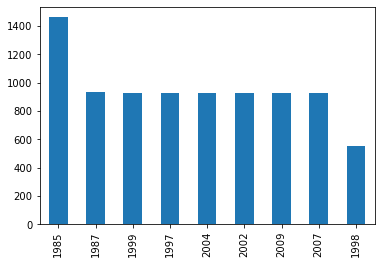

In [45]:
# Plot for Outlet_Establishment_Year

df2['Outlet_Establishment_Year'].value_counts().plot.bar()

In [46]:
# There is a fairly high number of data for outlets established in 1985 and low for those established in 1998

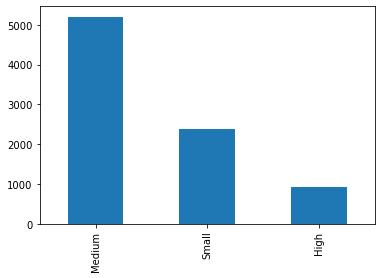

In [47]:
# Plot for Outlet_Size

df2['Outlet_Size'].value_counts().plot.bar()

In [48]:
# The maximum number of outlets are medium sized. However, this could be because:

# 1. Number of Data for medium sized outlets is more, or
# 2. We substituted Nan values in Outlet_Size with 'Medium'

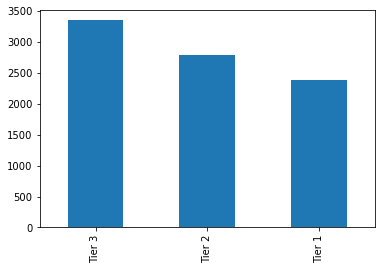

In [49]:
# Plot for Outlet_Location_Type

df2['Outlet_Location_Type'].value_counts().plot.bar()

In [50]:
# The is not a major difference, however, Tier 3 outlets seem to have more data

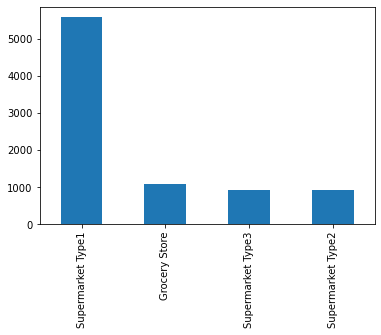

In [51]:
# Plot for Outlet_Type

df2['Outlet_Type'].value_counts().plot.bar()

In [52]:
# Clearly, Supermarket Type 1 is the most popular

### Bivariate Analysis - Numerical Varibales

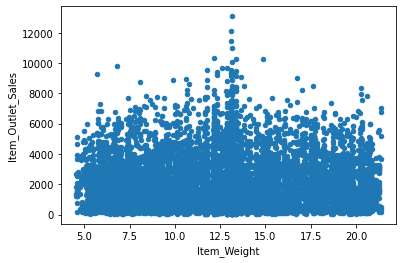

In [53]:
# Item_Weight vs Item_outlet_Sales

df2.plot.scatter(x = 'Item_Weight', y = 'Item_Outlet_Sales')

In [54]:
# Item weight is evenly distriuted. Hence no clear relation between the two

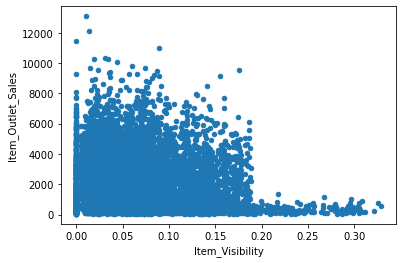

In [55]:
# Item_Visibility vs Item_Outlet_Sales

df2.plot.scatter(x = 'Item_Visibility', y = 'Item_Outlet_Sales')

In [56]:
# Sales are higher for items with less visibility

#There is a string of points with visibility 0. However, visibility cannot be zero. Let's explore it

In [57]:
df2[df2['Item_Visibility'] == 0].count()

Item_Identifier              526
Item_Weight                  526
Item_Fat_Content             526
Item_Visibility              526
Item_Type                    526
Item_MRP                     526
Outlet_Identifier            526
Outlet_Establishment_Year    526
Outlet_Size                  526
Outlet_Location_Type         526
Outlet_Type                  526
Item_Outlet_Sales            526
dtype: int64

In [58]:
# There are 526 elements having visibility 0. We will treat this later

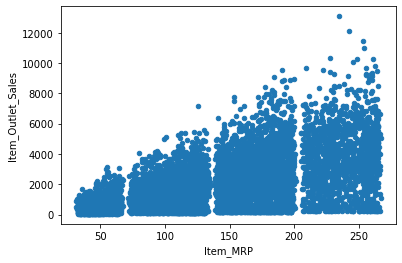

In [59]:
# Item_MRP vs Item_Outlet_Sales

df2.plot.scatter(x = 'Item_MRP', y = 'Item_Outlet_Sales')

In [60]:
# Total sales increase, as MRP increases.

# This is obvious because one unit of expensive item will generate more revenue than many units of cheap item

### Bivariate Analysis - Categorical Variables

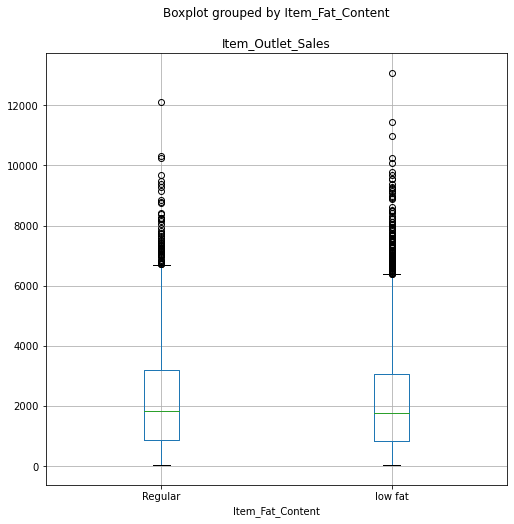

In [61]:
# Item_Fat_Content vs Item_Outlet_Sales

df2.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Fat_Content', figsize = (8,8))

In [62]:
# Distribution of Regular and low fat is similar

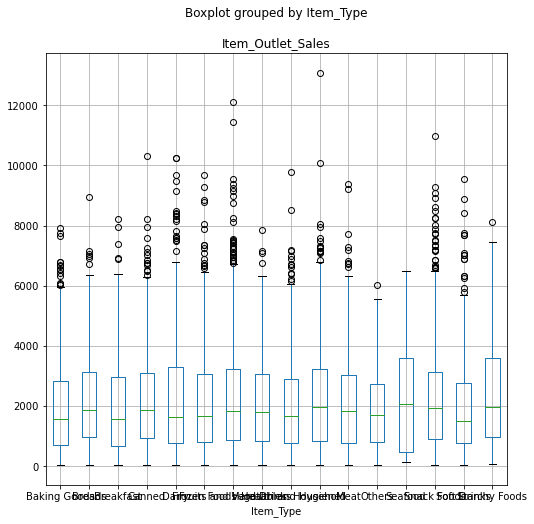

In [63]:
# Item_Type vs Item_Outlet_Sales

df2.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Type', figsize = (8,8))

In [64]:
# Distribution among all item types is similar

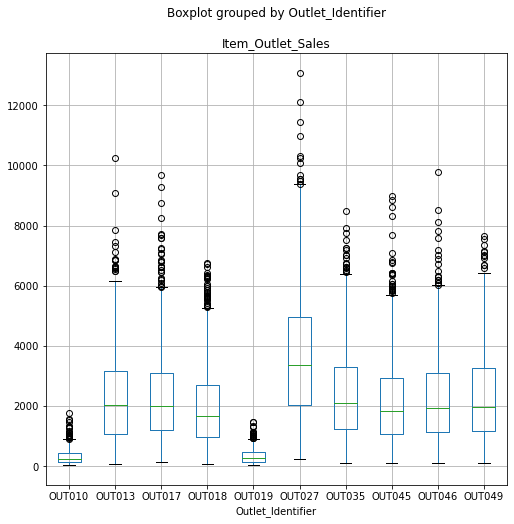

In [65]:
# Outlet_Identifier vs Item_Outlet_Sales

df2.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Identifier', figsize = (8,8))

In [66]:
# Distribution of OUT010 and OUT019 are very similar and quite different from the rest of the outlets

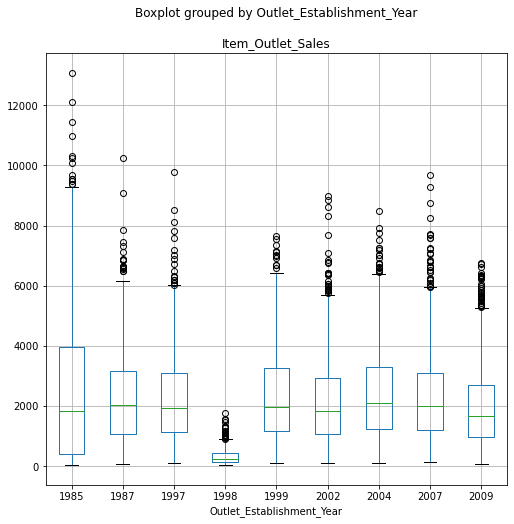

In [67]:
# Outlet_Establishment_Year vs Item_Outlet_Sales

df2.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Establishment_Year', figsize = (8,8))

In [68]:
# 1998 has very low sales. From Univariate analysis, it was also observed that volume of sales was also low for 1998

# All other years, average sales are around 2000.

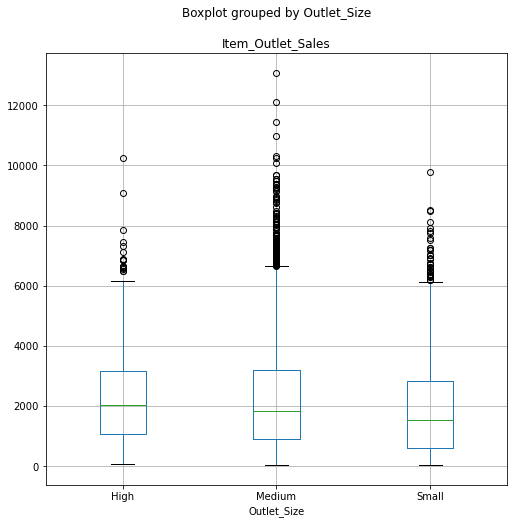

In [69]:
# Outlet_Size vs Item_Outlet_Sales

df2.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Size', figsize = (8,8))

In [70]:
# Distribution for all outlet sizes is similar, with medium outlets having slightly higher incomes

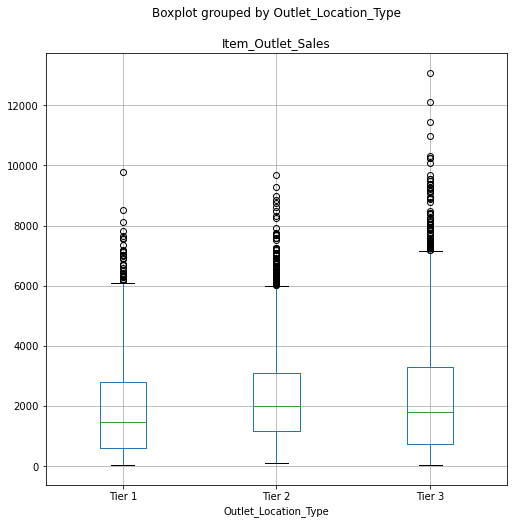

In [71]:
# Outlet_Location_Type vs Item_Outlet_Sales

df2.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Location_Type', figsize = (8,8))

In [72]:
# Tier3 has higher sales compared to others.

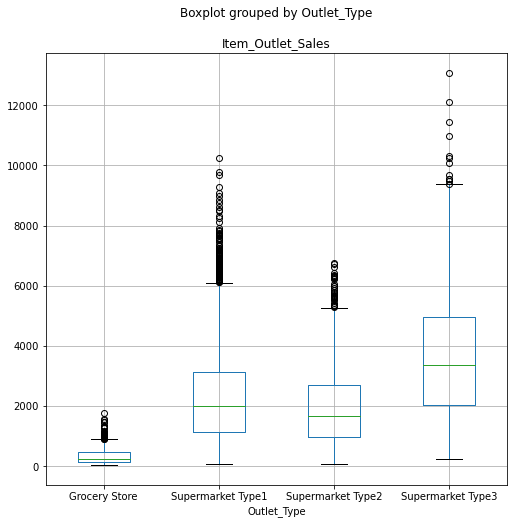

In [73]:
# Outlet_Type vs Item_Outlet_Sales

df2.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Type', figsize = (8,8))

In [74]:
# Supermarket Type 3 has the highest sales value. While Grocery store has the least

# It may be noted, in Univariate Analysis, we found that Supermarket Type 1 had the highest volume of sales

# Supermarket Type 3 had lowest volume of sales but has the highest sales amount

In [75]:
# Treat 0 Item_Visibility

# We will replace zeroes of Item_Visibility with mean of visibilities of that Item_Identifier

# First, lets check number of unoque Item_Identifier

len(df2['Item_Identifier'].unique())

1559

In [114]:
# Make a copy of df2

df3 = df2.copy()

In [115]:
ind = df3.loc[df3.Item_Visibility == 0].index

In [116]:
ind

Int64Index([   3,    4,    5,   10,   32,   33,   46,   60,   72,   79,
            ...
            8410, 8425, 8435, 8439, 8467, 8480, 8484, 8486, 8494, 8500],
           dtype='int64', length=526)

In [117]:
for i in ind:
    item = df3.Item_Identifier[i]
    df3.Item_Visibility[i] = df3.Item_Visibility[df3.Item_Identifier == item].mean()

<ipython-input-117-52b6b8ab1d97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.Item_Visibility[i] = df3.Item_Visibility[df3.Item_Identifier == item].mean()


In [118]:
df3['Item_Visibility'].describe()

count    8523.000000
mean        0.069751
std         0.049826
min         0.003575
25%         0.031142
50%         0.057059
75%         0.097255
max         0.328391
Name: Item_Visibility, dtype: float64

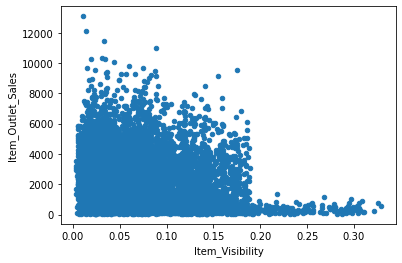

In [119]:
df3.plot.scatter(x = 'Item_Visibility', y = 'Item_Outlet_Sales')

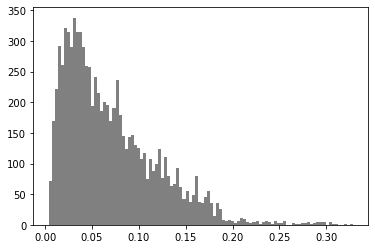

In [120]:
from matplotlib.pyplot import figure

plt.hist(df3['Item_Visibility'], bins = 100, color = 'Grey')
# figure(figsize = (50,50), dpi = 50)
plt.show()

## FEATURE ENGINEERING

In [121]:
df4 = df3.copy()

In [122]:
df4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [123]:
df4['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDT07     9
FDQ40     9
FDP25     9
         ..
FDQ60     1
FDO33     1
FDT35     1
FDN52     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [124]:
temp_list = []

for item in df4['Item_Identifier']:
    identifier = item[:2]
    temp_list.append(identifier)

In [125]:
np.unique(temp_list)

array(['DR', 'FD', 'NC'], dtype='<U2')

In [126]:
# Items can be classified into 3 categories DR, FD, NC.

# Probable DR stands for Drinks, FD stands for Food and NC stands for Non-consumables

# We can add a column Item_Category

In [127]:
df4['Item_Category'] = temp_list

In [128]:
df4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,low fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [129]:
df4.shape

(8523, 13)

In [130]:
# For all NC items, we can make Item_Fat_Content as 'Non-Edible'

for i in range(df4.shape[0]):
    if df4['Item_Category'].iloc[i] == 'NC':
        df4['Item_Fat_Content'].iloc[i] = 'Non-Edible'

print(df4['Item_Fat_Content'].unique())

C:\Users\SAK\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


['low fat' 'Regular' 'Non-Edible']


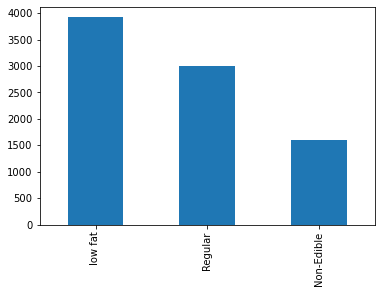

In [131]:
# Plot for Item_Fat_Content

df4['Item_Fat_Content'].value_counts().plot.bar()

In [132]:
# Explore Item_Type and categorize into Broader Categories

df4['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [148]:
# We can categorize them in two ways:

# 1. Food and Non-Food Items. But that categorization has been done by Item_Category column

# 2. Perishable and Non-Perishable items

Perishable = ["Dairy", "Meat", 'Fruits and Vegetables', 'Snack Foods', 'Breakfast', 'Breads', 'Starchy Foods', 'Seafood']

Non_Perishable = ['Soft Drinks', 'Household', 'Baking Goods', 'Frozen Foods', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Others']

Perishable

['Dairy',
 'Meat',
 'Fruits and Vegetables',
 'Snack Foods',
 'Breakfast',
 'Breads',
 'Starchy Foods',
 'Seafood']

In [150]:
for i in range(df4.shape[0]):
    df4['Item_Type_New'] = 'A'
df4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Item_Type_New
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,A
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,A
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,A
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,A
4,NCD19,8.93,Non-Edible,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,A


In [151]:
for i in range(df4.shape[0]):
    if df4['Item_Type'].iloc[i] in Perishable:
        df4['Item_Type_New'].iloc[i] = 'Perishable'
    elif df4['Item_Type'].iloc[i] in Non_Perishable:
        df4['Item_Type_New'].iloc[i] = 'Non-Perishable'
    else:
        df4['Item_Type_New'].iloc[i] = 'NA'
        
print(df4['Item_Type_New'].unique())

C:\Users\SAK\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


['Perishable' 'Non-Perishable']


In [152]:
df4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Item_Type_New
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishable
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable
4,NCD19,8.93,Non-Edible,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishable


In [155]:
# Establishment Year doesnot make much sense to us.

# We will calculate number of years in operation

for i in range(df4.shape[0]):
    df4['Years_in_Operation'] = 1

In [158]:
for i in range(df4.shape[0]):
    df4['Years_in_Operation'].iloc[i] = 2021 - df4['Outlet_Establishment_Year'].iloc[i]
    
df4.drop('Outlet_Establishment_Year', axis = 'columns', inplace = True)
df4.head()

C:\Users\SAK\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Item_Type_New,Years_in_Operation
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishable,12
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,22
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable,23
4,NCD19,8.93,Non-Edible,0.008082,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishable,34


In [159]:
# Let's calculate price per unit weight

df4['price_per_unit_wt'] = df4['Item_MRP'] / df4['Item_Weight']

In [160]:
df4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Item_Type_New,Years_in_Operation,price_per_unit_wt
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,22,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishable,12,8.153581
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,22,8.092457
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable,23,9.484115
4,NCD19,8.93,Non-Edible,0.008082,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishable,34,6.031512


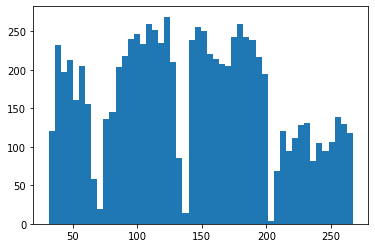

In [163]:
# Plot for Item_MRP

plt.hist(df2['Item_MRP'], bins = 50)
plt.show()

In [165]:
for i in range(df4.shape[0]):
    df4['Item_MRP_Cluster'] = 'A'

In [167]:
for i in range(df4.shape[0]):
    if df4['Item_MRP'].iloc[i] < 70:
        df4['Item_MRP_Cluster'].iloc[i] = 'Cheap'
    elif df4['Item_MRP'].iloc[i] >= 70 and df4['Item_MRP'].iloc[i] < 135:
        df4['Item_MRP_Cluster'].iloc[i] = 'Lower Middle Range'
    elif df4['Item_MRP'].iloc[i] >= 135 and df4['Item_MRP'].iloc[i] < 200:
        df4['Item_MRP_Cluster'].iloc[i] = 'Upper Middle Range'
    else:
        df4['Item_MRP_Cluster'].iloc[i] = 'Expensive'
    
df4.head()

C:\Users\SAK\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Item_Type_New,Years_in_Operation,price_per_unit_wt,Item_MRP_Cluster
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,22,26.861204,Expensive
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishable,12,8.153581,Cheap
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,22,8.092457,Upper Middle Range
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable,23,9.484115,Upper Middle Range
4,NCD19,8.93,Non-Edible,0.008082,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishable,34,6.031512,Cheap


## Encoding Categorical Data

### Label Encoding

In [168]:
df5 = df4.copy()

In [169]:
# Item_Fat_Content

df5['Item_Fat_Content'].unique()

array(['low fat', 'Regular', 'Non-Edible'], dtype=object)

In [171]:
df5['Item_Fat_Content'].replace({'low fat' : 1, 'Regular' : 2, 'Non-Edible' : 0}, inplace = True)

df5['Item_Fat_Content'].unique()

array([1, 2, 0], dtype=int64)

In [172]:
# Outlet_Size

df5['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [173]:
df5['Outlet_Size'].replace({'Medium' : 1, 'High' : 2, 'Small' : 0}, inplace = True)

df5['Outlet_Size'].unique()

array([1, 2, 0], dtype=int64)

In [174]:
# Outlet_Location_Type

df5['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [175]:
df5['Outlet_Location_Type'].replace({'Tier 1' : 1, 'Tier 2' : 2, 'Tier 3' : 3}, inplace = True)

df5['Outlet_Location_Type'].unique()

array([1, 3, 2], dtype=int64)

In [176]:
# Outlet_Type

df5['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [177]:
df5['Outlet_Type'].replace({'Grocery Store' : 0, 'Supermarket Type1' : 1, 'Supermarket Type2' : 2, 'Supermarket Type3' : 3}, inplace = True)

df5['Outlet_Type'].unique()

array([1, 2, 0, 3], dtype=int64)

In [178]:
# Item_Category

df5['Item_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [179]:
df5['Item_Category'].replace({'FD' : 0, 'DR' : 1, 'NC' : 2}, inplace = True)

df5['Item_Category'].unique()

array([0, 1, 2], dtype=int64)

In [180]:
# Item_Type_New

df5['Item_Type_New'].unique()

array(['Perishable', 'Non-Perishable'], dtype=object)

In [181]:
df5['Item_Type_New'].replace({'Perishable' : 0, 'Non-Perishable' : 1}, inplace = True)

df5['Item_Type_New'].unique()

array([0, 1], dtype=int64)

In [182]:
# Item_MRP_Cluster

df5['Item_MRP_Cluster'].unique()

array(['Expensive', 'Cheap', 'Upper Middle Range', 'Lower Middle Range'],
      dtype=object)

In [183]:
df5['Item_MRP_Cluster'].replace({'Cheap' : 0, 'Lower Middle Range' : 1, 'Upper Middle Range' : 2, 'Expensive' : 3}, inplace = True)

df5['Item_MRP_Cluster'].unique()

array([3, 0, 2, 1], dtype=int64)

### One Hot Encoding

In [253]:
# Item_Type

Item_Type = pd.get_dummies(df5.Item_Type, prefix = 'Type')

In [254]:
df6 = pd.concat([df5, Item_Type], axis = 1)

df6.drop('Item_Type', axis = 1, inplace = True)

In [255]:
df6.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Type_Fruits and Vegetables,Type_Hard Drinks,Type_Health and Hygiene,Type_Household,Type_Meat,Type_Others,Type_Seafood,Type_Snack Foods,Type_Soft Drinks,Type_Starchy Foods
0,FDA15,9.30,1,0.016047,249.8092,OUT049,1,1,1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,2,0.019278,48.2692,OUT018,1,3,2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,1,0.016760,141.6180,OUT049,1,1,1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,2,0.015274,182.0950,OUT010,1,3,0,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.008082,53.8614,OUT013,2,3,1,994.7052,...,0,0,0,1,0,0,0,0,0,0


In [256]:
# Outlet_Identifier

Outlet_Id = pd.get_dummies(df6.Outlet_Identifier, prefix = 'Outlet')

In [257]:
df7 = pd.concat([df6, Outlet_Id], axis = 1)

df7.drop('Outlet_Identifier', axis = 1, inplace = True)

In [258]:
df7.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,...,Outlet_OUT010,Outlet_OUT013,Outlet_OUT017,Outlet_OUT018,Outlet_OUT019,Outlet_OUT027,Outlet_OUT035,Outlet_OUT045,Outlet_OUT046,Outlet_OUT049
0,FDA15,9.30,1,0.016047,249.8092,1,1,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,2,0.019278,48.2692,1,3,2,443.4228,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,1,0.016760,141.6180,1,1,1,2097.2700,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,2,0.015274,182.0950,1,3,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.008082,53.8614,2,3,1,994.7052,2,...,0,1,0,0,0,0,0,0,0,0


In [259]:
# Item_Identifier

Item_Id = pd.get_dummies(df7.Item_Identifier, prefix = 'Item')

In [260]:
df8 = pd.concat([df7, Item_Id], axis = 1)

df8.drop('Item_Identifier', axis = 1, inplace = True)

In [261]:
df8.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Item_Type_New,...,Item_NCZ05,Item_NCZ06,Item_NCZ17,Item_NCZ18,Item_NCZ29,Item_NCZ30,Item_NCZ41,Item_NCZ42,Item_NCZ53,Item_NCZ54
0,9.30,1,0.016047,249.8092,1,1,1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,2,0.019278,48.2692,1,3,2,443.4228,1,1,...,0,0,0,0,0,0,0,0,0,0
2,17.50,1,0.016760,141.6180,1,1,1,2097.2700,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19.20,2,0.015274,182.0950,1,3,0,732.3800,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0,0.008082,53.8614,2,3,1,994.7052,2,1,...,0,0,0,0,0,0,0,0,0,0


## Data Pre-Processing

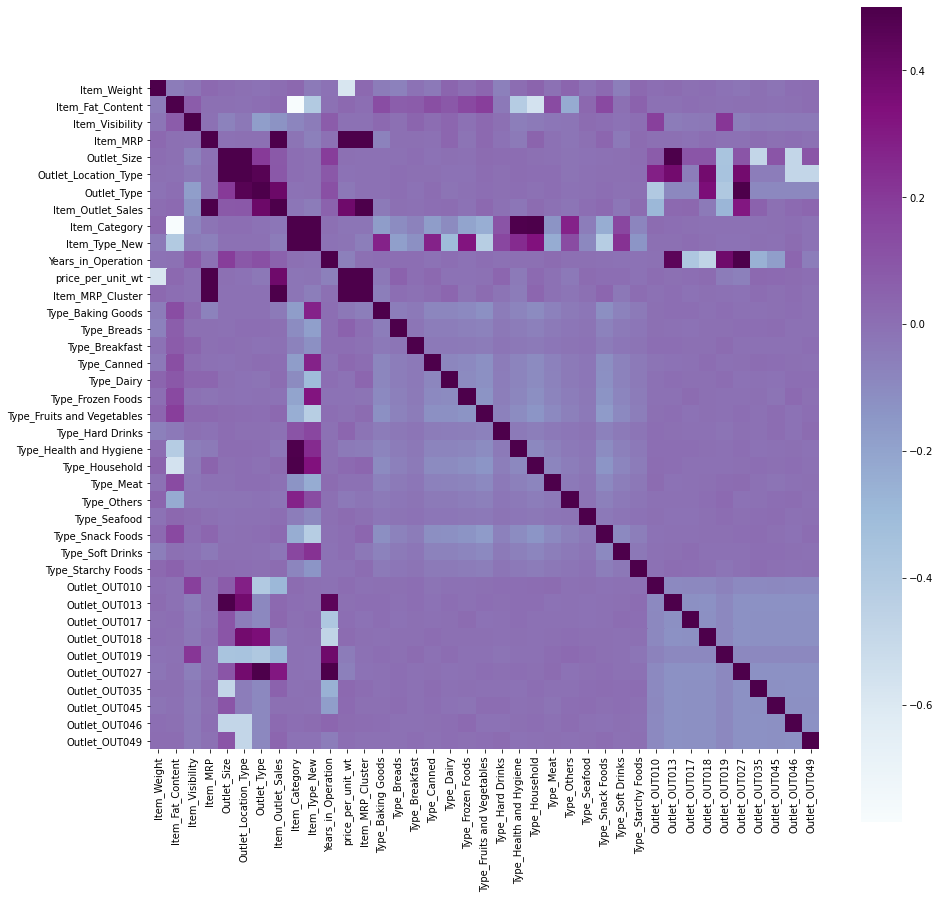

In [262]:
# Heat Map

import seaborn as sns

temp_df = df7.drop(columns = 'Item_Identifier')
matrix = temp_df.corr()

fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(matrix, vmax = 0.5, square= True, cmap = 'BuPu', ax=ax)

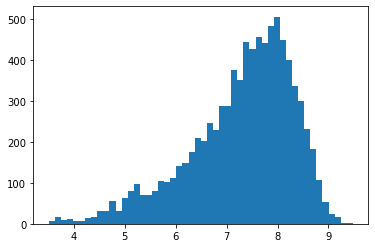

In [263]:
# Remove skewdness of Item_Outlet_Sales

df8['log_Item_Outlet_Sales'] = np.log(df8['Item_Outlet_Sales'])

plt.hist(df8['log_Item_Outlet_Sales'], bins = 50)
plt.show()

In [264]:
df8.drop(columns = 'Item_Outlet_Sales', inplace = True)

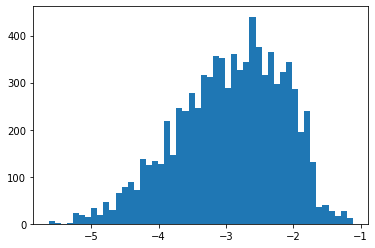

In [265]:
# Remove skewdness of Item_Visibility

df8['log_Item_Visibility'] = np.log(df8['Item_Visibility'])

plt.hist(df8['log_Item_Visibility'], bins = 50)
plt.show()

In [266]:
df8.drop(columns = 'Item_Visibility', inplace = True)

In [267]:
df8.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category,Item_Type_New,Years_in_Operation,price_per_unit_wt,...,Item_NCZ17,Item_NCZ18,Item_NCZ29,Item_NCZ30,Item_NCZ41,Item_NCZ42,Item_NCZ53,Item_NCZ54,log_Item_Outlet_Sales,log_Item_Visibility
0,9.30,1,249.8092,1,1,1,0,0,22,26.861204,...,0,0,0,0,0,0,0,0,8.225540,-4.132215
1,5.92,2,48.2692,1,3,2,1,1,12,8.153581,...,0,0,0,0,0,0,0,0,6.094524,-3.948780
2,17.50,1,141.6180,1,1,1,0,0,22,8.092457,...,0,0,0,0,0,0,0,0,7.648392,-4.088756
3,19.20,2,182.0950,1,3,0,0,0,23,9.484115,...,0,0,0,0,0,0,0,0,6.596300,-4.181625
4,8.93,0,53.8614,2,3,1,2,1,34,6.031512,...,0,0,0,0,0,0,0,0,6.902446,-4.818097


In [268]:
from sklearn.model_selection import train_test_split

X = df8.drop(columns = 'log_Item_Outlet_Sales')
y = df8.log_Item_Outlet_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [271]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [272]:
reg.fit(X_train, y_train)

LinearRegression()

In [274]:
reg.score(X_train, y_train)

0.8080004951742021

In [278]:
y_pred = reg.predict(X_test)

In [281]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 3.2015578057940705e+18
RMSE : 1789289748.9769707


In [286]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : -2.944123540155037e+18
Adjusted R2 :  -4.688585525630078e+19


<ipython-input-290-0ef8e466123a>:2: RuntimeWarning: overflow encountered in power
  plt.plot(10**(y_pred))


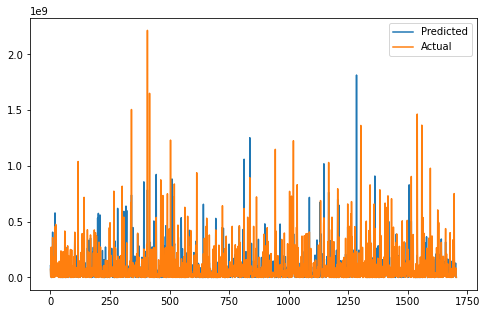

In [290]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [291]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [292]:
lasso.score(X_train, y_train)

0.788944641151466

In [297]:
## Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

C:\Users\SAK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 486.6118659057033, tolerance: 0.5625452873409651
  model = cd_fast.enet_coordinate_descent(
C:\Users\SAK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 498.87612504348806, tolerance: 0.5536860473202647
  model = cd_fast.enet_coordinate_descent(
C:\Users\SAK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491.54269597226113, tolerance: 0.5478613594617792
  model = cd_fast.enet_coordinate_descent(
C:\Users\SAK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [299]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.28229742423664345


In [300]:
y_pred_lasso = lasso_regressor.predict(X_test)

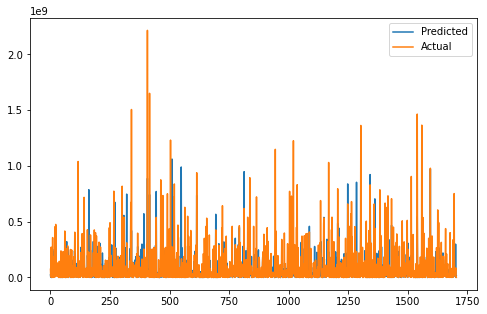

In [301]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [302]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1.93619078444776e+16
RMSE : 139147072.7125713
R2 : 0.39023141954933904
Adjusted R2 :  -8.710707112971274


In [303]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

C:\Users\SAK\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07669e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\SAK\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.49896e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\SAK\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.18185e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\SAK\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07277e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [304]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.27719437597395596


In [305]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [306]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1.973519167332502e+16
RMSE : 140481997.68413398
R2 : 0.37847551448823724
Adjusted R2 :  -8.89792264777611
